<a href="https://colab.research.google.com/github/psharma0912/Demo_repo/blob/main/Deep_Learning_project_Customer_retention_for_Telecom_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Problem Statement:
### To develop a predictive framework for enabling proactive retention strategy for a telecom company.

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings;
warnings.filterwarnings('ignore')

# Importing the Data for ML Project

In [ ]:
tele=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Deep Learning/TelcoChurn.xlsx')

In [ ]:
tele.shape

(7043, 21)

In [ ]:
tele.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
tele.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
tele.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
tele=tele.drop(['customerID'], axis=1)


# Label the Churn feature to 1/0

In [ ]:
tele['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
tele['PaymentMethod'].value_counts()/len(tele)

Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: PaymentMethod, dtype: float64

In [ ]:
len(tele)

7043

In [ ]:
tele['churn']=tele['Churn'].map({'Yes':1,'No':0})

In [ ]:
#df['target']=np.where(df['Churn']=="Yes",1,0)
tele['churn'].value_counts()/len(tele)

0    0.73463
1    0.26537
Name: churn, dtype: float64

In [ ]:
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
tele.shape

(7043, 21)

# Drop the Churn feature to retain only Target

In [ ]:
tele=tele.drop(['Churn'],axis=1)
tele.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# Defining Target and Independent Features

In [ ]:
# Y=df[['target']]
# X=df.drop(['target'],axis=1)

# Get the Churn Rate

In [ ]:
tele['churn'].value_counts()/len(tele)

0    0.73463
1    0.26537
Name: churn, dtype: float64

<Axes: >

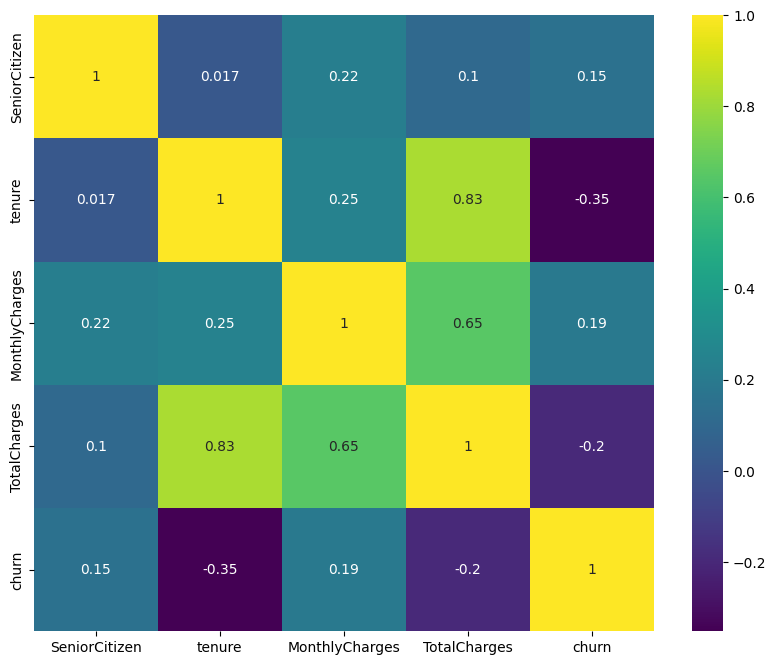

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(tele.corr(), annot = True, cmap = 'viridis')

From the above heat map we can infer that churn is positively correlated to the monthly charges and negatively correlated to the total charges and tenure.


# Split features into Numerical and Categorical


In [ ]:
tele.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'churn'],
      dtype='object')

### Taking only the categorical variables

In [ ]:

tele_char=tele.drop(['MonthlyCharges', 'TotalCharges','SeniorCitizen', 'tenure'], axis=1, inplace=False)


In [ ]:
tele_char.shape

(7043, 16)

In [ ]:
enumerate(list(tele_char.columns.values))

In [ ]:
list(enumerate(list(tele_char.columns.values)))

[(0, 'gender'),
 (1, 'Partner'),
 (2, 'Dependents'),
 (3, 'PhoneService'),
 (4, 'MultipleLines'),
 (5, 'InternetService'),
 (6, 'OnlineSecurity'),
 (7, 'OnlineBackup'),
 (8, 'DeviceProtection'),
 (9, 'TechSupport'),
 (10, 'StreamingTV'),
 (11, 'StreamingMovies'),
 (12, 'Contract'),
 (13, 'PaperlessBilling'),
 (14, 'PaymentMethod'),
 (15, 'churn')]

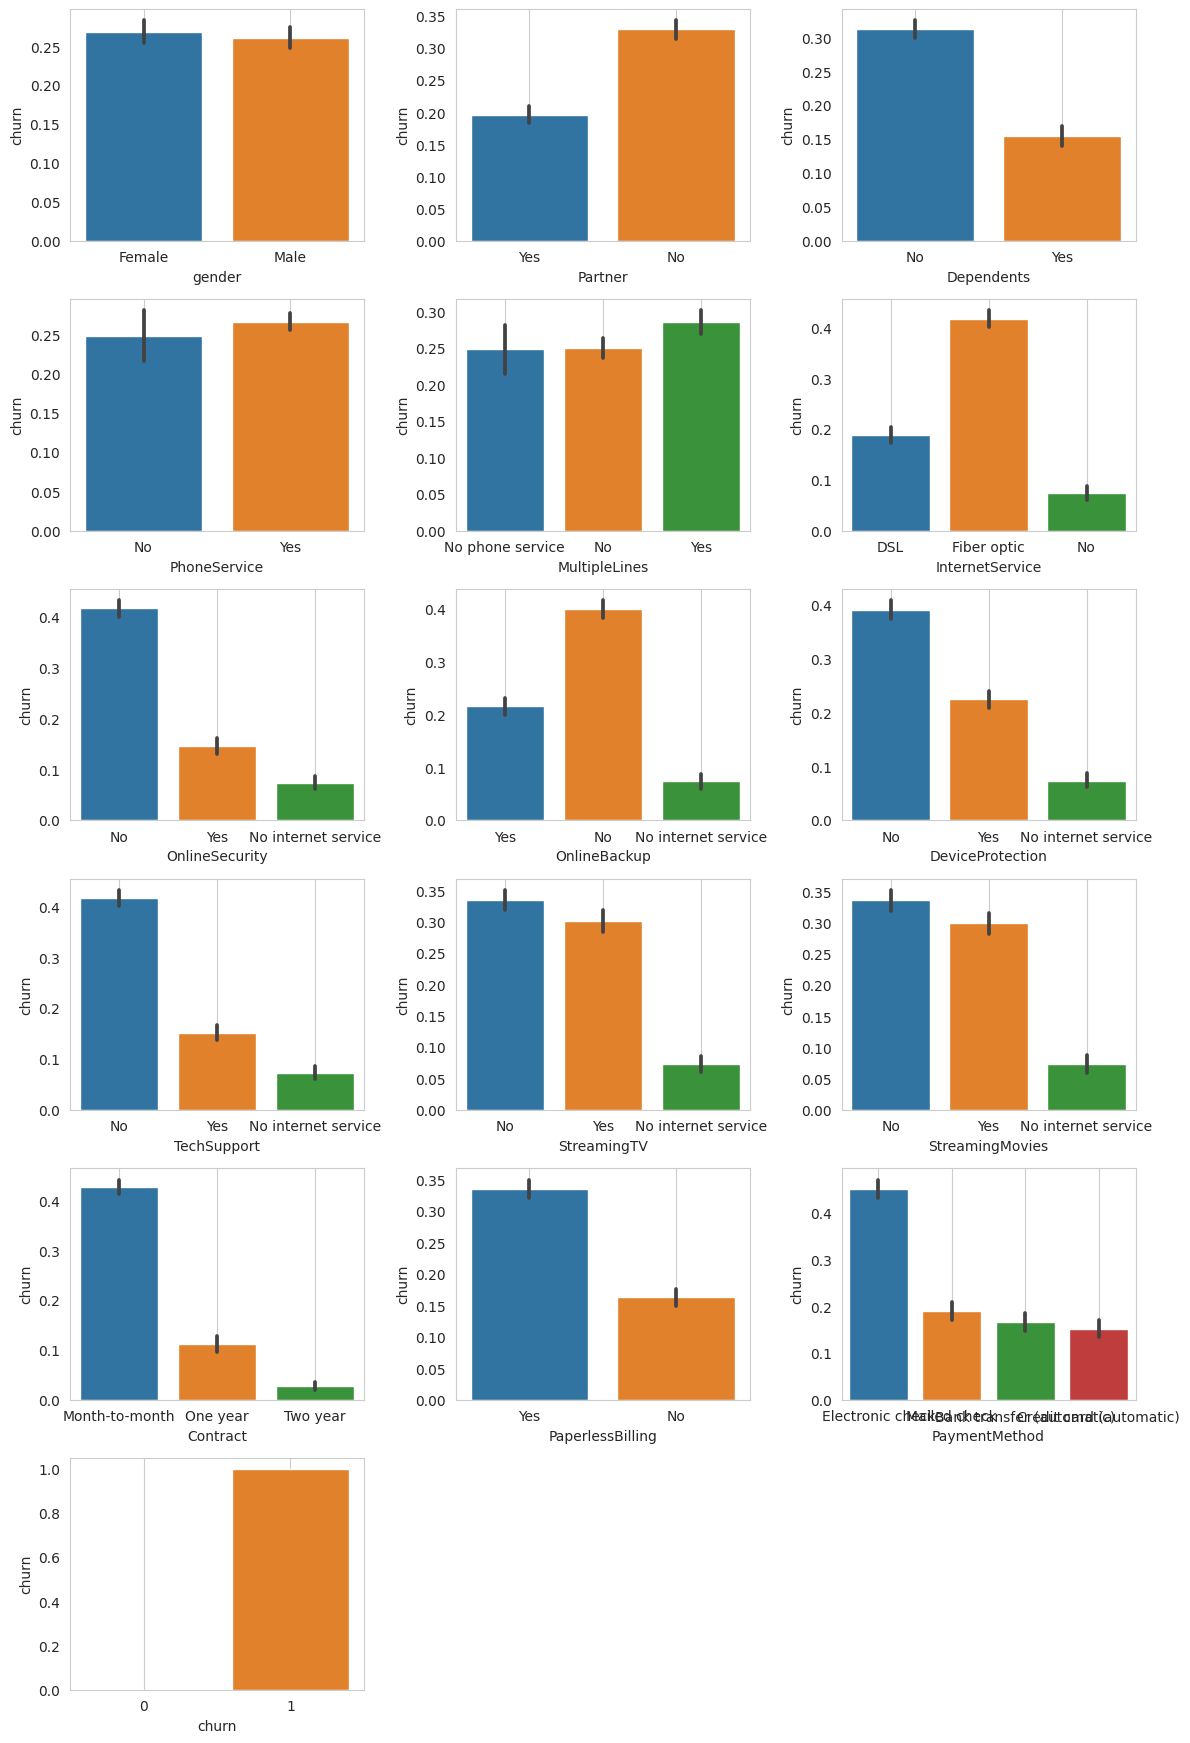

In [ ]:
plt.figure(figsize=(12,20))
sns.set_style("whitegrid")

for i, col in enumerate(list(tele_char.columns.values)):
  plt.subplot(7,3,i+1)
  sns.barplot(y=tele_char.churn, x=tele_char[col], data=tele_char)
  plt.grid()
  plt.tight_layout()

### Some of the findings are:
 1. Less churn rate with the customer's partner, however churn rate increases with the number of dependents.
 2. The customers with the phone service have a high churn rate and also with he customers with multiple lines and fiber optic internet service.
 3. The customers with no online backup, no online security and no device protection, for these customers the churn rate is high.
 4. The customers with no streaming TV, no Tech support and no streaming movies, for them the churn rate is high.
 5. Less churn rate for customers who have one year or two year contract with the telecom companny compared to customers with month to month contract.


### Taking the numerical features now

In [ ]:
tele_num=tele[['MonthlyCharges', 'TotalCharges','SeniorCitizen', 'tenure']]
##df = df._get_numeric_data() #drop non-numeric cols, another approach


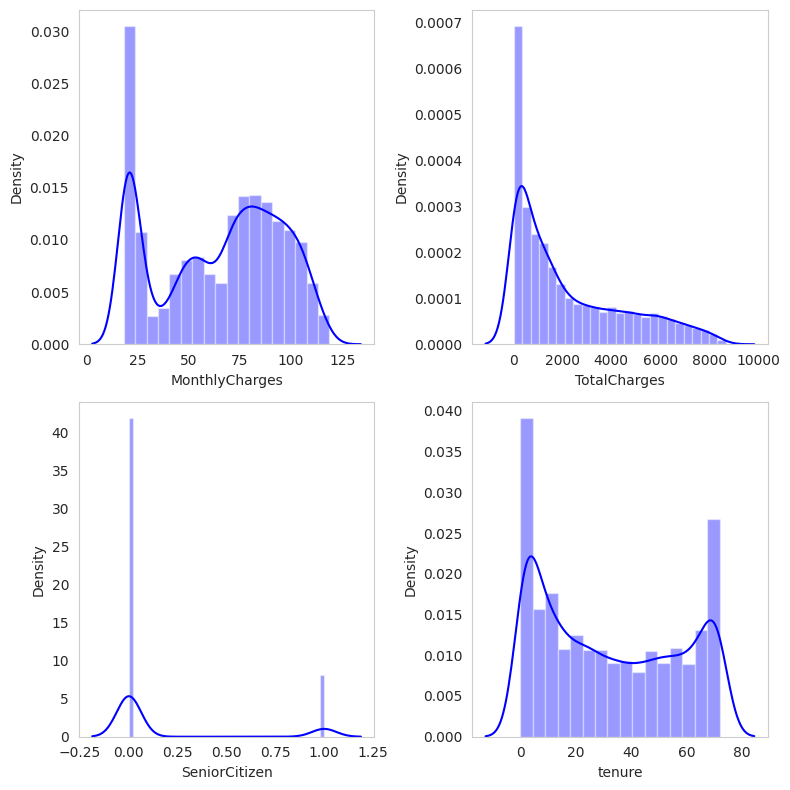

In [ ]:
plt.figure(figsize=(8,8))
for i,col in enumerate(list(tele_num.columns.values)):
    plt.subplot(2,2,i+1)
    sns.distplot(tele_num[col], kde=True, color='b')
    plt.grid()
    plt.tight_layout()



### From the plots we can conclude:
1. The customers have stayed maximum for around 5 months or 75 months with the current service provider.
2. Low monthly and total charges are in big numbers.

In [ ]:
tele_num['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
tele_num=tele_num.drop(['SeniorCitizen'], axis=1)

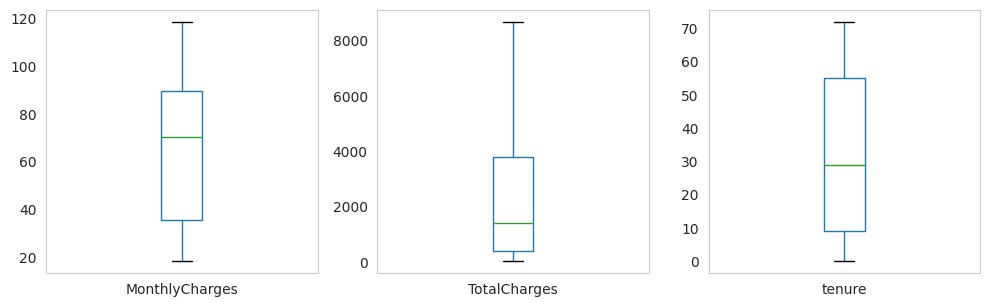

In [ ]:
plt.figure(figsize=(10,12))
for i, col in enumerate(list(tele_num.columns.values)):
  plt.subplot(4,3,i+1)
  tele_num.boxplot(col)
  plt.grid()
  plt.tight_layout()

### Variance Inflation Factor (VIF)

In [ ]:
#calculate VIF for each explanatory variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(tele_num.values, i) for i in range(tele_num.shape[1])]
vif['variable'] = tele_num.columns

#view VIF for each explanatory variable
vif.sort_values(by='VIF', ascending=False)


,VIF,variable
1,8.075651,TotalCharges
2,6.332253,tenure
0,3.355907,MonthlyCharges


The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression.
If the VIF is between 5-10, multicolinearity is likely present and we should consider dropping the variable. As expected,
the total charges and the tenure have a high variance inflation factor
because they "explain" the same variance within this dataset. We would need to
discard one of these variables before moving on to model building or risk building a model with high multicolinearity. But I will
keep both the features and later see what impact these have on the model if I include them.

In [ ]:
tele_num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,MonthlyCharges,TotalCharges,tenure
count,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.798992,32.371149
std,30.090047,2266.730170,24.559481
min,18.250000,18.800000,0.000000
1%,19.200000,19.871000,1.000000
5%,19.650000,49.070000,1.000000
10%,20.050000,83.470000,2.000000
25%,35.500000,398.550000,9.000000
50%,70.350000,1394.550000,29.000000
75%,89.850000,3786.600000,55.000000


In [ ]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.05))
    x=x.clip(upper=x.quantile(0.90))
    return(x)
tele_num=tele_num.apply(lambda x : outlier_cap(x))

In [ ]:
tele_num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,MonthlyCharges,TotalCharges,tenure
count,7043.000000,7043.000000,7043.000000
mean,64.209094,2175.963951,32.153344
std,29.259887,2046.834123,24.215127
min,19.650000,49.070000,1.000000
1%,19.650000,49.070000,1.000000
5%,19.650000,49.088000,1.000000
10%,20.050000,83.470000,2.000000
25%,35.500000,398.550000,9.000000
50%,70.350000,1394.550000,29.000000
75%,89.850000,3786.600000,55.000000


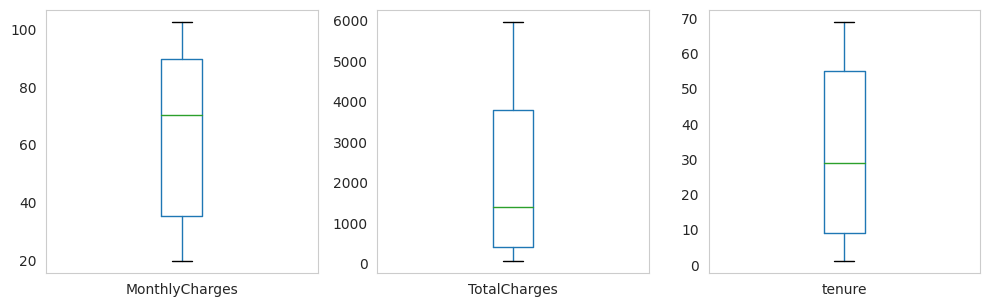

In [ ]:
plt.figure(figsize=(10,12))
for i, col in enumerate(list(tele_num.columns.values)):
  plt.subplot(4,3,i+1)
  tele_num.boxplot(col)
  plt.grid()
  plt.tight_layout()

In [ ]:
tele_num.columns
tele_char.columns


Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'churn'],
      dtype='object')

### Converting categorical values into dummy variables

In [ ]:
tele_char_dum = pd.get_dummies(tele_char, drop_first = True)

In [ ]:
pd.set_option('display.max_columns',None)
tele_char_dum.head()

,churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
tele=pd.concat([tele_num, tele_char_dum],axis=1, join="inner")

In [ ]:
tele.head()

,MonthlyCharges,TotalCharges,tenure,churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,29.85,49.07,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,56.95,1889.50,34,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,53.85,108.15,2,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,42.30,1840.75,45,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,70.70,151.65,2,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(tele.drop('churn',axis=1))
scaled_features

array([[-1.17435632, -1.03918776, -1.28661539, ..., -0.52504733,
         1.40641839, -0.54480692],
       [-0.24810791, -0.13996459,  0.07626585, ..., -0.52504733,
        -0.71102597,  1.83551265],
       [-0.35406253, -1.01032162, -1.24531596, ..., -0.52504733,
        -0.71102597,  1.83551265],
       ...,
       [-1.18290105, -0.89388965, -0.87362108, ..., -0.52504733,
         1.40641839, -0.54480692],
       [ 0.34831404, -0.91336013, -1.1627171 , ..., -0.52504733,
        -0.71102597,  1.83551265],
       [ 1.31215925,  1.8555464 ,  1.39784767, ..., -0.52504733,
        -0.71102597, -0.54480692]])

In [ ]:
#tele_feat=pd.DataFrame(scaled_features,columns=tele.columns[:-1])
tele_feat=pd.DataFrame(scaled_features,columns=tele.columns.drop(['churn']))
tele_feat.head()

,MonthlyCharges,TotalCharges,tenure,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-1.174356,-1.039188,-1.286615,-1.009559,1.034530,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,-0.633933,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807
1,-0.248108,-0.139965,0.076266,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513
2,-0.354063,-1.010322,-1.245316,0.990532,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,1.378241,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513
3,-0.748829,-0.163784,0.530560,0.990532,-0.966622,-0.654012,-3.054010,3.054010,-0.854176,-0.885660,-0.525927,-0.525927,1.577454,-0.525927,-0.725563,-0.525927,1.381277,-0.525927,1.563872,-0.525927,-0.790132,-0.525927,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807
4,0.221852,-0.989068,-1.245316,-1.009559,-0.966622,-0.654012,0.327438,-0.327438,-0.854176,1.129102,-0.525927,-0.525927,-0.633933,-0.525927,-0.725563,-0.525927,-0.723968,-0.525927,-0.639439,-0.525927,-0.790132,-0.525927,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807


In [ ]:
###Logistic regression
from sklearn.model_selection import train_test_split

In [ ]:
X=tele_feat # X contains the scaled features.
y=tele['churn']
print(X.shape)
print(y.shape)


(7043, 29)
(7043,)


In [ ]:
X.head()
y.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=32)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4695, 29)
(4695,)
(2348, 29)
(2348,)


In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred=log_reg.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[1515,  167],
       [ 299,  367]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1682
           1       0.69      0.55      0.61       666

    accuracy                           0.80      2348
   macro avg       0.76      0.73      0.74      2348
weighted avg       0.79      0.80      0.79      2348



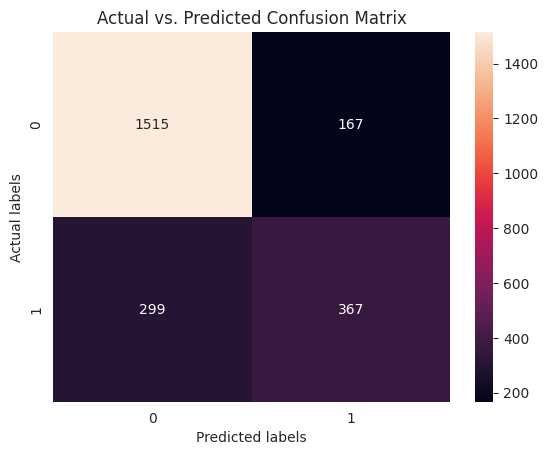

In [ ]:
ax= plt.subplot()
sns.heatmap(conf_matrix ,annot=True, ax= ax, fmt='')

ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels');
ax.set_title('Actual vs. Predicted Confusion Matrix');
ax.xaxis.set_ticklabels(['0','1']); ax.yaxis.set_ticklabels(['0','1']);

plt.show()

In [ ]:
367/(367+299)

0.551051051051051

In [ ]:
coeff_df=pd.DataFrame(tele.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(log_reg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,MonthlyCharges,-0.612089
1,TotalCharges,0.543003
2,tenure,-1.331854
3,churn,-0.010855
4,gender_Male,-0.007036
5,Partner_Yes,-0.091341
6,Dependents_Yes,-0.020336
7,PhoneService_Yes,0.020336
8,MultipleLines_No phone service,0.198506
9,MultipleLines_Yes,0.622344


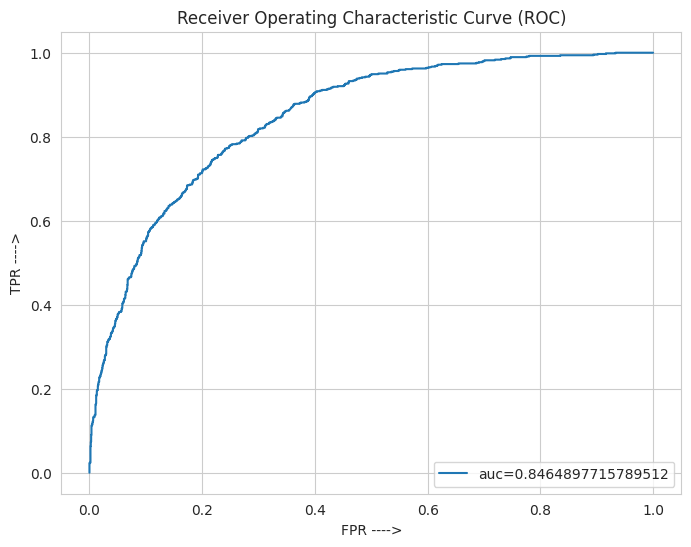

In [ ]:
from sklearn import metrics

y_pred_proba = log_reg.predict_proba(X_test)[::,1]    #[0.25 to be labeled as 0, 0.75 to be labeld as 1]

# metrics.roc_curve returns three outputs: fpr, tpr and different thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

#metrics.roc_auc_score directly returns the auc for y_actual and corresponding prob values of success for each row
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plotting the AUC curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

In [ ]:
# Deep learning
import tensorflow
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from keras.layers import Dropout

In [ ]:
X=tele_feat # X contains the scaled features.
y=tele['churn']
print(X.shape)
print(y.shape)

(7043, 29)
(7043,)


In [ ]:
X.shape


(7043, 29)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,  random_state=101)

In [ ]:
X_train.shape

(5634, 29)

In [ ]:
X_test.shape

(1409, 29)

In [ ]:
y_train.shape

(5634,)

In [ ]:
y_test.shape

(1409,)

In [ ]:
len(X_train.columns)

29

In [ ]:
#Model building
model=Sequential()

#flatten the data
model.add(Flatten())

#hidden layer1
model.add(Dense(200, activation='sigmoid', input_shape=(29,), kernel_initializer='glorot_uniform'))
model.add(Dropout(0.3))
#hidden layer2
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
#hidden layer3
model.add(Dense(25, activation='sigmoid', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))
#hidden layer4
model.add(Dense(12, activation='sigmoid', kernel_initializer='glorot_uniform'))
model.add(Dropout(0.2))

#output layer
model.add(Dense(2))


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Accuracy'])

In [ ]:
history=model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
177/177 [==============================] - 3s 6ms/step - loss: 1.9974 - Accuracy: 0.4475 - val_loss: 0.5679 - val_Accuracy: 0.2718
Epoch 2/100
177/177 [==============================] - 1s 4ms/step - loss: 1.4528 - Accuracy: 0.4434 - val_loss: 0.5192 - val_Accuracy: 0.3925
Epoch 3/100
177/177 [==============================] - 2s 9ms/step - loss: 1.3583 - Accuracy: 0.4792 - val_loss: 0.5032 - val_Accuracy: 0.2704
Epoch 4/100
177/177 [==============================] - 1s 4ms/step - loss: 1.2378 - Accuracy: 0.4514 - val_loss: 0.4914 - val_Accuracy: 0.3059
Epoch 5/100
177/177 [==============================] - 1s 4ms/step - loss: 1.1607 - Accuracy: 0.3901 - val_loss: 0.5822 - val_Accuracy: 0.2718
Epoch 6/100
177/177 [==============================] - 1s 5ms/step - loss: 1.0868 - Accuracy: 0.4894 - val_loss: 0.4994 - val_Accuracy: 0.6842
Epoch 7/100
177/177 [==============================] - 3s 15ms/step - loss: 0.9937 - Accuracy: 0.4767 - val_loss: 0.5344 - val_Accuracy: 0.271

In [ ]:
model.evaluate(X_test,y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.4378 - Accuracy: 0.7480


[0.4378228783607483, 0.7480482459068298]

In [ ]:
yp=model.predict(X_test)


45/45 [==============================] - 0s 2ms/step


In [ ]:
yp[:5]

array([[0.08816126, 0.08725287],
       [0.40428647, 0.41423678],
       [0.1605204 , 0.1580038 ],
       [0.22813201, 0.2282839 ],
       [0.7157564 , 0.73685795]], dtype=float32)

In [ ]:
yp_max=np.max(yp, axis=1)

In [ ]:
yp_max

array([0.08816126, 0.41423678, 0.1605204 , ..., 0.07269938, 0.07392115,
       0.10786208], dtype=float32)

In [ ]:
yp_pred=[]
for element in yp_max:
  if element > 0.5:
    yp_pred.append(1)
  else:
    yp_pred.append(0)



In [ ]:
yp_pred[:10]

[0, 0, 0, 0, 1, 0, 1, 0, 0, 0]

In [ ]:
y_test[:10]

1093    0
646     1
710     1
3638    1
5481    1
877     0
5025    0
4001    0
493     0
2687    0
Name: churn, dtype: int64

In [ ]:
tensorflow.__version__

'2.14.0'

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])


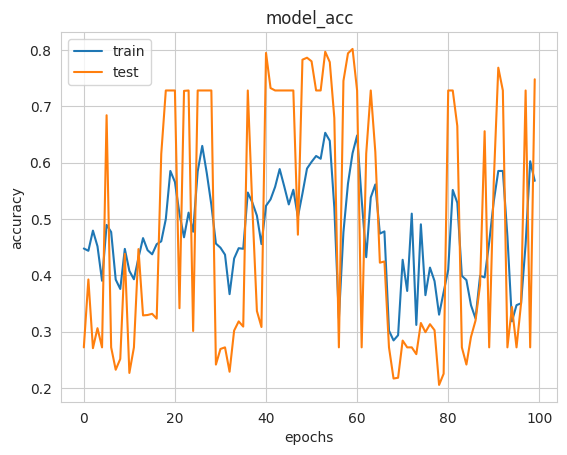

In [ ]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('model_acc')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'])
plt.show()

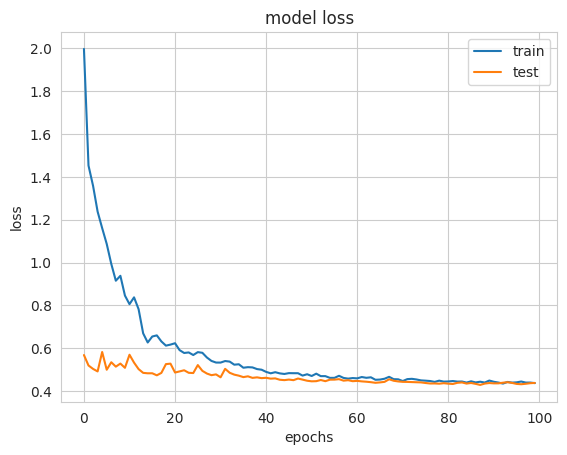

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
print(classification_report(y_test, yp_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1026
           1       0.69      0.48      0.57       383

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

